# Writing custom datasets, dataloaders and transforms

In [1]:
# import essential packages
from __future__ import print_function, division 
import os 

import torch 
import pandas as pd
from skimage import io, transform 
import numpy as np 
import matplotlib.pyplot as plt 
from torch.utils.data import Dataset, DataLoader 
from torchvision import transforms, utils 

plt.ion()

In [3]:
IMG_PATH = '/media/toanmh/Workspace/Datasets/faces/'
CSV_PATH = IMG_PATH + 'face_landmarks.csv'

landmarks_frame = pd.read_csv(CSV_PATH)

In [12]:
n = 0
img_name = landmarks_frame.iloc[n, 0]
landmarks = landmarks_frame.iloc[n, 1:]
landmarks = np.array([landmarks])
landmarks = landmarks.astype('float').reshape(-1, 2)

print('Image name: {}'.format(img_name))
print('Landmarks shape: {}'.format(landmarks.shape))
print('First 4 landmarks: {}'.format(landmarks[:4]))

Image name: 0805personali01.jpg
Landmarks shape: (68, 2)
First 4 landmarks: [[ 27.  83.]
 [ 27.  98.]
 [ 29. 113.]
 [ 33. 127.]]


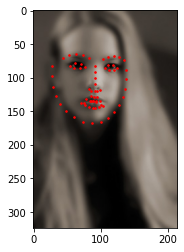

In [13]:
def show_landmarks(image, landmarks):
    plt.imshow(image)
    plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='r')
    plt.pause(0.001) # pause a bit so that plots are updated

plt.figure()
show_landmarks(io.imread(os.path.join(IMG_PATH, img_name)), landmarks)
plt.show()

In [30]:
class FaceLandmarksDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        '''
        Args:
            csv_file (string): Path to the csv file with annotations
            root_dir (string): Directory with all the images
            transform (callable, optional): Optional transform to be applied on a sample
        '''
        self.landmakrs_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir 
        self.transform = transform 

    def __len__(self):
        return len(self.landmakrs_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir, self.landmakrs_frame.iloc[idx, 0])
        
        image = io.imread(img_name)
        landmarks = self.landmakrs_frame.iloc[idx, 1:]
        landmarks = np.array([landmarks])
        landmarks = landmarks.astype('float').reshape(-1, 2)

        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)
        
        return sample

0 (324, 215, 3) (68, 2)


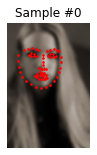

1 (500, 333, 3) (68, 2)


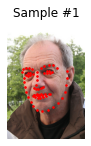

2 (250, 258, 3) (68, 2)


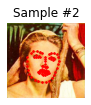

3 (434, 290, 3) (68, 2)


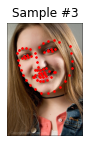

In [32]:
face_dataset = FaceLandmarksDataset(csv_file=CSV_PATH, root_dir=IMG_PATH)

fig = plt.figure()

for i in range(len(face_dataset)):
    sample = face_dataset[i]

    print(i, sample['image'].shape, sample['landmarks'].shape)

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_landmarks(**sample)

    if i == 3:
        plt.show()
        break